In [2]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

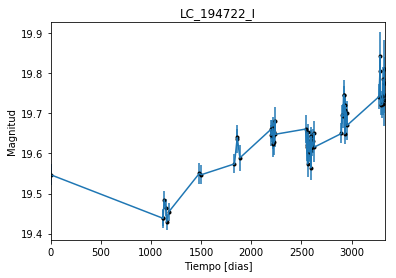

In [3]:
data = np.genfromtxt('LC_194722_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_194722_I')
plt.savefig("LC_194722_I.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

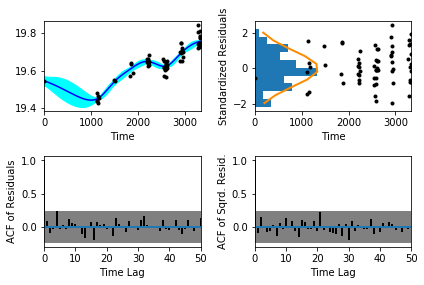

In [6]:
sample.assess_fit()

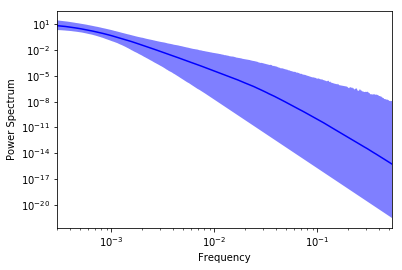

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

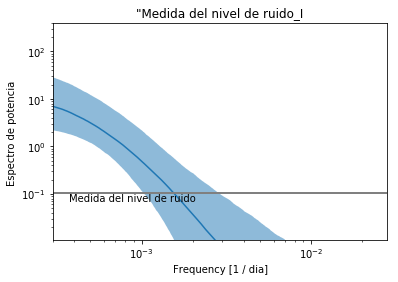

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_194722_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_194722_I')

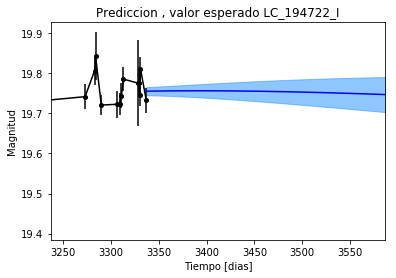

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_194722_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_194722_I')

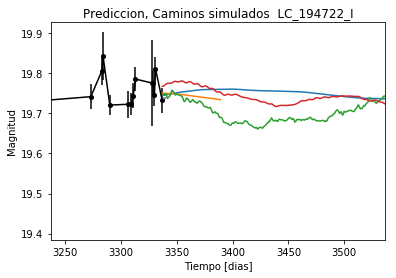

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_194722_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


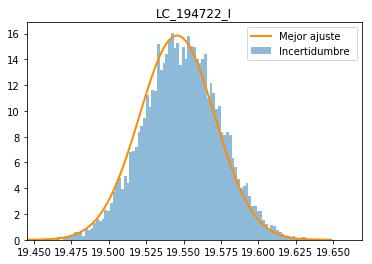

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_194722_I')
plt.savefig("Mejor_ajuste_LC_194722_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_194722_I')

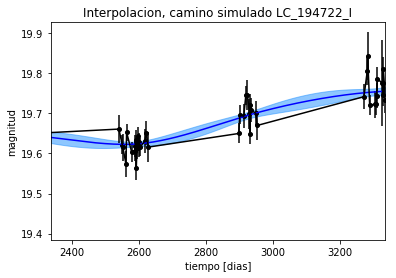

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_194722_I')

Text(0.5,1,'Interpolacion, camino simulado LC_194722_I')

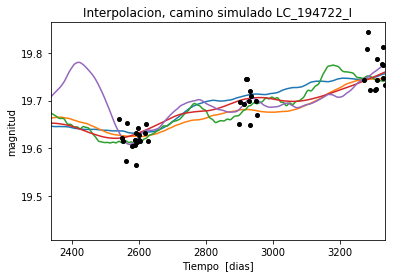

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_194722_I')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 174.939345014
Median: 0.0137587274843
Standard deviation: 0.248291728785
68% credibility interval: [ 0.00060751  0.3251976 ]
95% credibility interval: [  3.21119376e-04   9.35275225e-01]
99% credibility interval: [  3.03567437e-04   1.04396176e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 382.008682148
Median: 0.000571893384568
Standard deviation: 0.0613551588851
68% credibility interval: [ 0.00034763  0.00704258]
95% credibility interval: [ 0.00030526  0.13537573]
99% credibility interval: [  3.01018240e-04   4.51914748e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 530.130774685
Median: 0.00737578210869
Standar

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 378.237507751
Median: 158.669322496
Standard deviation: 1.73263067964
68% credibility interval: [ 156.66122319  159.93217936]
95% credibility interval: [ 154.10218249  160.62400682]
99% credibility interval: [ 151.84798246  160.81933386]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 247.529419617
Median: 0.725040841049
Standard deviation: 2.3415310115
68% credibility interval: [ 0.04215553  4.07491151]
95% credibility interval: [ 0.01132963  8.28734167]
99% credibility interval: [  8.49944771e-03   1.11168785e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 261.257242775
Median: 0.0866682748398
Standard deviation: 7.35809210855
68% credibility interval: [ 0.00332121  3.28543812]
95% credibility interval: [  1.1

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 3.84768226603e-35
Standard deviation: 1.70283045948e+18
68% credibility interval: [  3.86535234e-88   4.58693157e-08]
95% credibility interval: [  3.32710685e-132   2.96883877e+000]
99% credibility interval: [  1.84656488e-137   4.62258885e+001]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2043.16807738
Median: 19.6049108358
Standard deviation: 0.0637050926467
68% credibility interval: [ 19.54929416  19.65986356]
95% credibility interval: [ 19.47778571  19.73320413]
99% credibility interval: [ 19.40726012  19.79541608]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 394.325384009
Median: 0.0
Standard deviation: 0.185895989366
68% credibility interval: [ 0.          0.10336303]
95% credibility interval: [ 0.          0.76012671]
99% credibility interval: [ 0.          0.99093114]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 394.325384009
Median: 0.0
Standard deviation: 0.185895989366
68% credibility interval: [ 0.          0.10336303]
95% credibility interval: [ 0.          0.76012671]
99% credibility interval: [ 0.          0.99093114]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 274.441234435
Median: 0.0
Standard deviation: 0.000130645610686
68% credibility interval: [ 0.

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 378.237507751
Median: 158.669322496
Standard deviation: 1.73263067964
68% credibility interval: [ 156.66122319  159.93217936]
95% credibility interval: [ 154.10218249  160.62400682]
99% credibility interval: [ 151.84798246  160.81933386]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1366.4493135
Median: 0.0104057884579
Standard deviation: 0.0117845461552
68% credibility interval: [ 0.00586333  0.02011497]
95% credibility interval: [ 0.00367464  0.04053381]
99% credibility interval: [ 0.0027841   0.07194871]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1260.14681513
Median: 0.97472877882
Standard deviation: 0.138667757159
68% credibility interval: [ 0.85194256  1.12368098]
95% credibility interval: [ 0.74925511  1.29515091]
99% credibility interval: [ 0.69564681  1.41068959]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 816.939005665
Median: 2.9659775715e-06
Standard deviation: 0.0236769682994
68% credibility interval: [  8.61393392e-08   1.54773727e-04]
95% credibility interval: [  1.90710485e-09   3.39653544e-03]
99% credibility interval: [  5.68187063e-10   1.24505498e-01]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 174.939345014
Median: (-0.0864486343749-0.65404301475j)
Standard deviation: 1.94886239867
68% credibility interval: [-2.04327681+0.j         -0.00381712-0.00555292j]
95% credibility interval: [ -5.87650755e+00+0.j          -2.01765254e-03-0.00356177j]
99% credibility interval: [ -6.55940519e+00+0.j          -1.90737046e-03-0.00246516j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 382.008682148
Median: (-0.00359331211119+0j)
Standard deviation: 1.22999309448
68% credibility interval: [-0.04424985 +2.44411212e+00j -0.00218420 +1.41104738e-03j]
95% credibility interval: [-0.8505908+0.j -0.0019180+0.j]
99% credibility interval: [ -2.83946411e+00+5.81581694j  -1.89135338e-03+0.j        ]
Posterior summary for parameter a